# Gradient descent where both m and b is non-constant

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

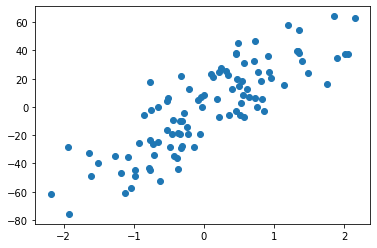

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# First Fectching results for linear regression using sklearn

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [7]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5186510664660601

# Making out own class

In [12]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # now calculating b using Gradient Descent
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)
            
        print(self.b, self.m)
    def predict(self, X):
        return self.m*X+self.b
    

In [13]:
gd = GDRegressor(0.001,50)
gd.fit(X_train,y_train) # our output using class is nearly same to the the sklearn code form above

-2.3004574196824854 28.159367347119066


In [14]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5196191457922588

# Visualize how the gradient descent algorithm is optimizing towards point of convergence

In [15]:
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt

In [16]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [17]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

<IPython.core.display.Javascript object>


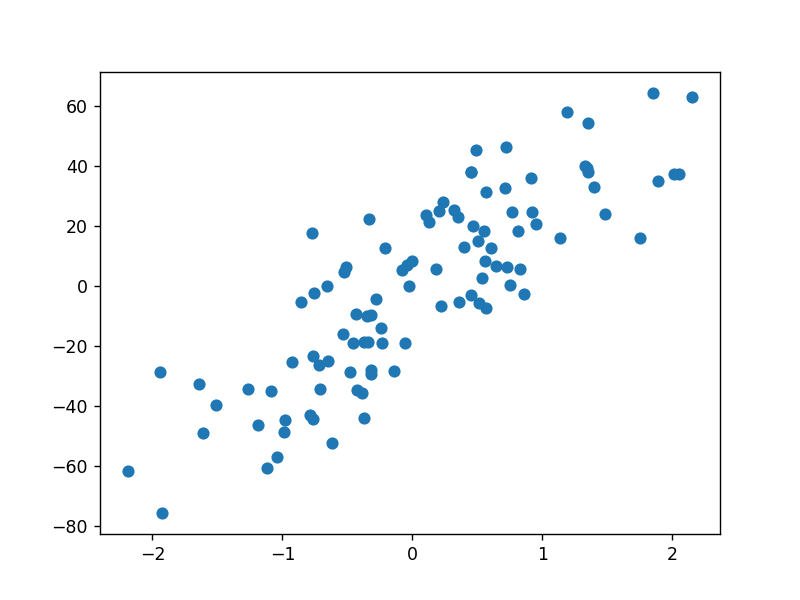

In [19]:
plt.scatter(X,y)

In [20]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


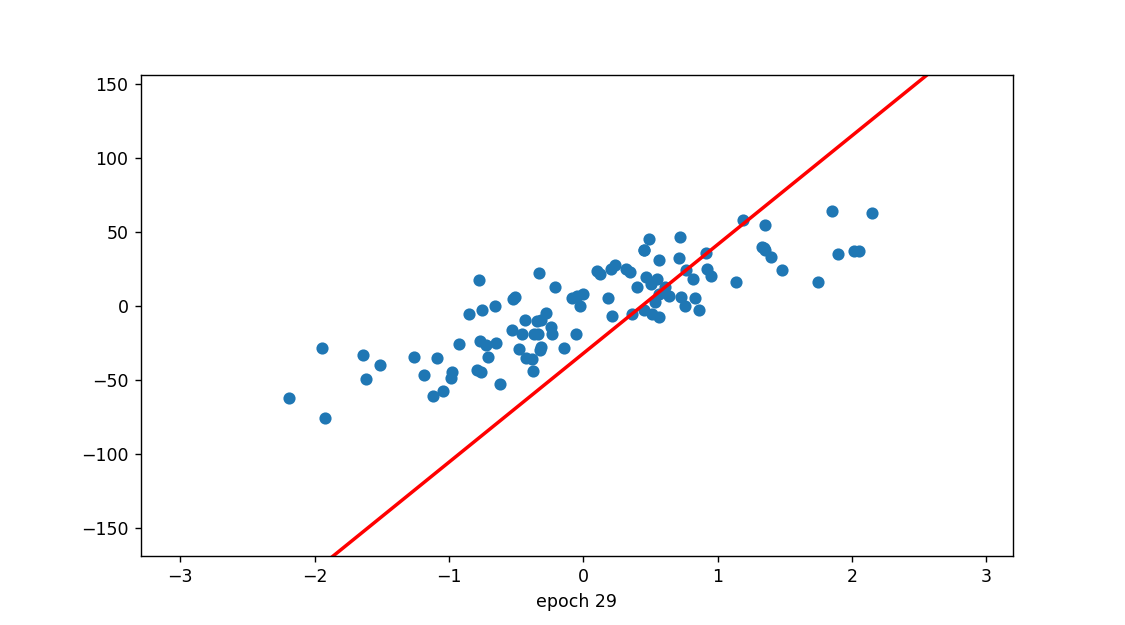

In [21]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

# Check the graph below no matter how off you give the value of m and b gradient descent 
# is designed in such a wonderful way that with correct learning rate it will coverge to the point of convergence after some epochs

<IPython.core.display.Javascript object>


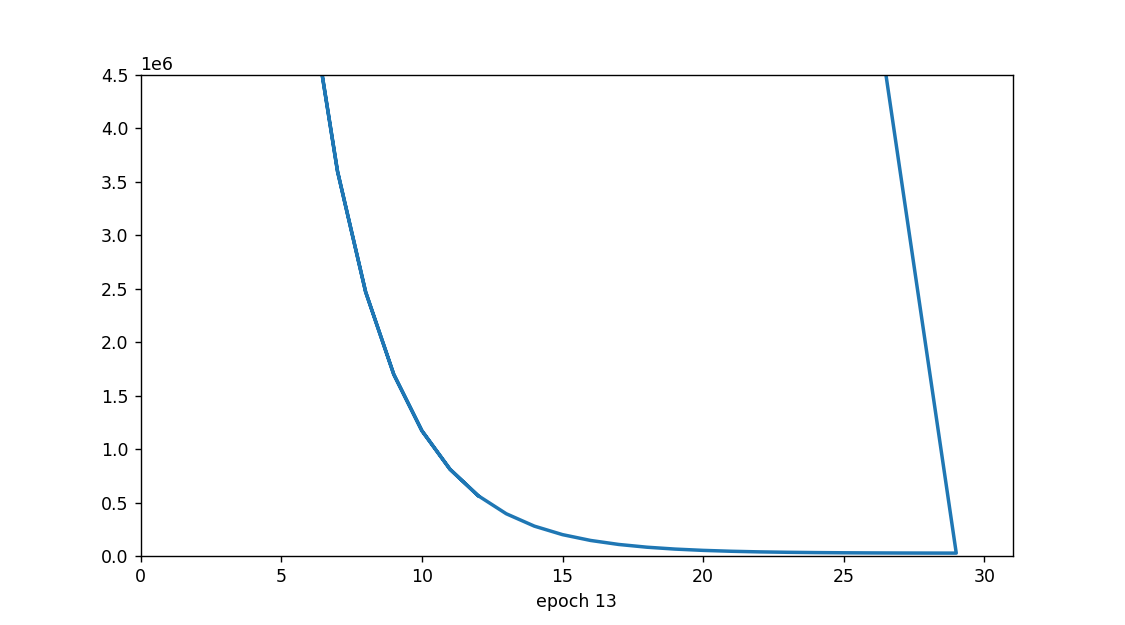

In [26]:
# Cost function
# creating a blank window 
# for the animation 
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

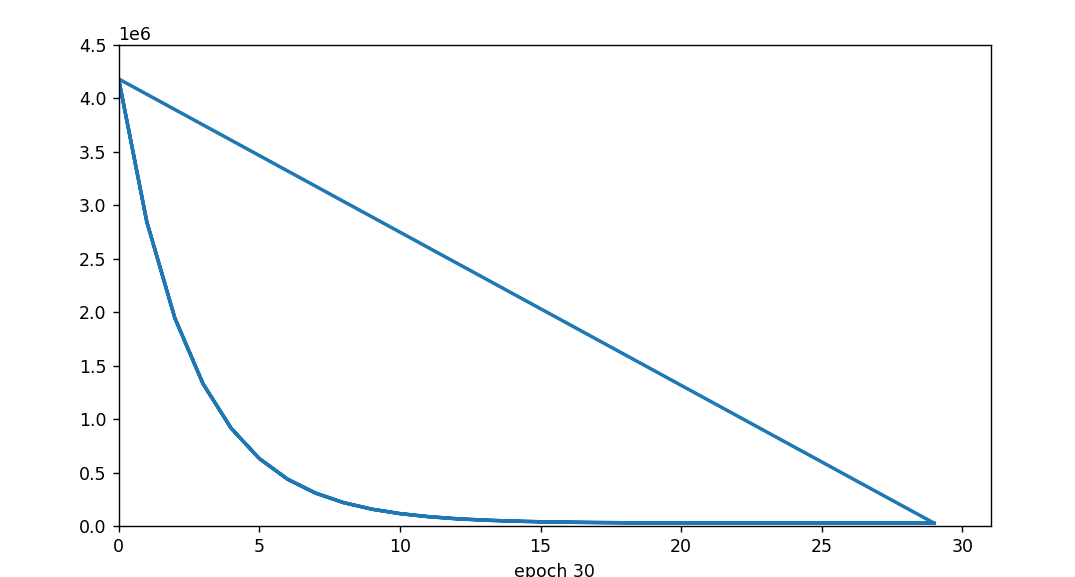

In [ ]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-10, 160)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation6.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

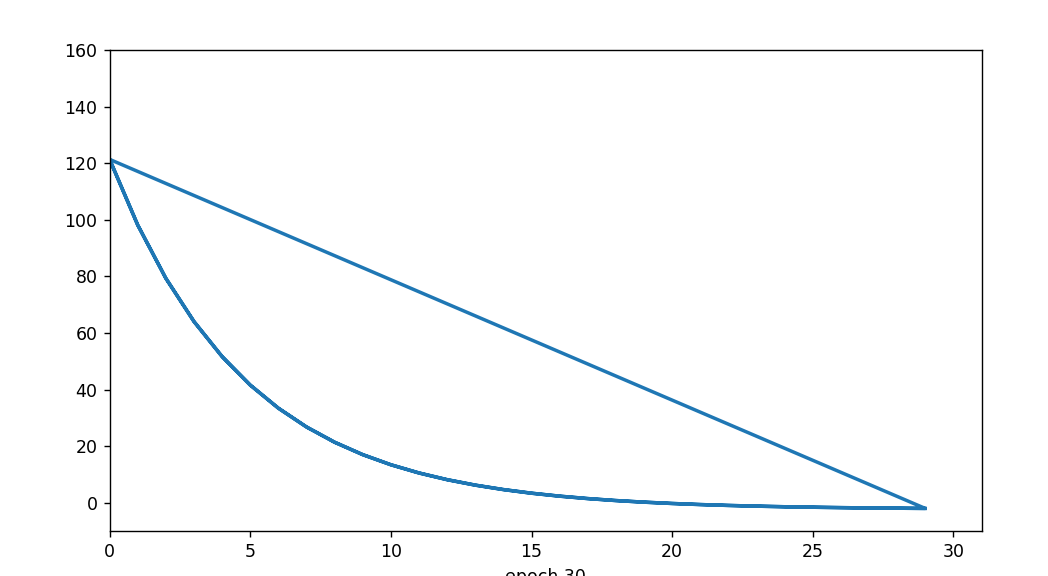

In [ ]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 50)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_m[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation7.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

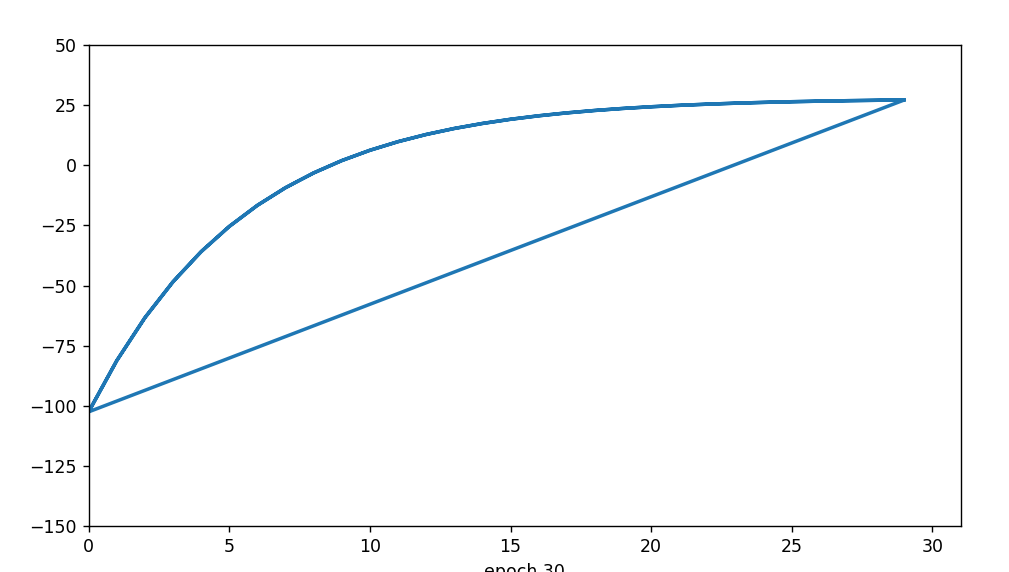